# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

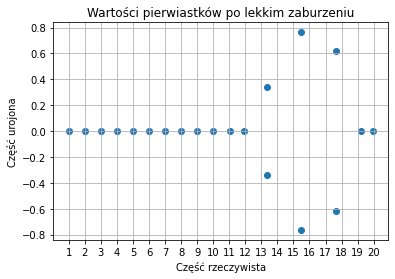

In [2]:
x = np.arange(1, 21)
a = main.polly_A(x)
a, a_new = main.roots_20(a)
plt.scatter(np.real(a_new), np.imag(a_new))
plt.xticks(x)
plt.title('Wartości pierwiastków po lekkim zaburzeniu')
plt.ylabel('Część urojona')
plt.xlabel('Część rzeczywista')
plt.grid()
plt.show()




- pierwiastki od 1 do 12 są odporne na zaburzenia. Nie występuje wsród nich żaden rozrzut
- najbardziej podatny na zaburzenia wydaje się pierwiastek 15/16.
- zaburzenie spowodowało powstanie sprzężonych par zespolonych dla pierwiastków od 13 do 18 

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

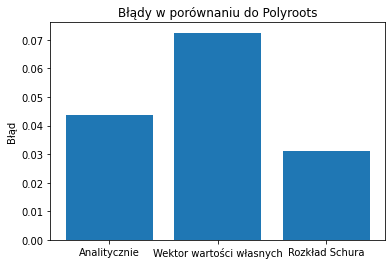

In [38]:
W = np.array([1, 1, 1, 1, 1, 1, 1, 1])
poly = main.polly_A(W)
frob, eigvals, schur, p_roots = main.frob_a(poly[:-1])
roots = np.sort(P.polyroots(poly))
errors = [np.linalg.norm(roots - W), np.linalg.norm(roots - np.sort(eigvals)), np.linalg.norm(roots - np.sort(np.diag(schur[0])))]
plt.bar([0, 1, 2], errors)
plt.title("Błądy w porównaniu do Polyroots")
plt.xticks([0, 1, 2], ('Analitycznie', 'Wektor wartości własnych', 'Rozkład Schura'))
plt.ylabel("Błąd")
plt.show()


Najmniejszy błąd wystąpił podczas metody Schura. Nieco większy błąd pojawił się podczas metody analitycznej. Najgorzej poradził sobie wektor wartości własnych. Może to wynikać ze złego uwarunkowania macierzy Forbeniusa.

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


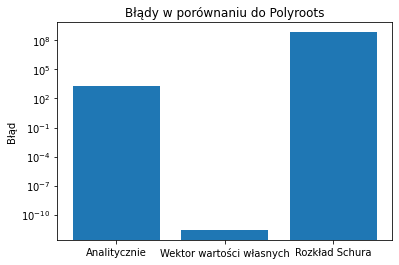

In [36]:
W = np.array([16, -72, -28, 558, -990, 783, -486, 243])
poly = main.polly_A(W)
frob, eigvals, schur, p_roots = main.frob_a(poly[:-1])
roots = np.sort(P.polyroots(poly))
errors = [np.linalg.norm(roots - W), np.linalg.norm(roots - np.sort(eigvals)), np.linalg.norm(roots - np.sort(np.diag(schur[0])))]
plt.bar([0, 1, 2], errors)
plt.title("Błądy w porównaniu do Polyroots")
plt.xticks([0, 1, 2], ('Analitycznie', 'Wektor wartości własnych', 'Rozkład Schura'))
plt.ylabel("Błąd")
plt.yscale('log')
plt.show()

W tym przypadku metoda analityczna oraz rozkład Schura obarczone były sporymi błędami. Zdecydowanie lepiej wypadł wektor wartości własnych, z zaskakująco małym błędem.

***Zadanie 4.***

Dany jest wielomian: 

w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624

 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

In [30]:
a0 = 1
a1 = -156
a2 = -5
a3 = 780
a4 = 4
a5 = -624
coeffs = np.array([a0 + a2 / 2 + 3 * a4 / 4, a1 + 3 * a3 / 4 + 5 * a5 / 8, a2 / 2 + a4 / 4, a3 /4 + 5 * a5 / 16, a4 / 8, a5 / 16])
cheb_roots = np.sort(np.polynomial.chebyshev.chebroots(coeffs))
print(cheb_roots)

[-0.99946576 -0.50825851  0.02246995  0.49113043  1.00053414]


Obliczono pierwiastki podanego wielomianu za pomocą funkcji chebroots.

Wnioski:

Zapoznano się z numerycznymi metodami rozwiązywania równań nieliniowych, czyli znajdowaniem miejsc zerowych funkcji. Zapoznano się z praktycznym wykorzystaniem macierzy Forbeniusa, rozkładem Schura oraz funkcjami takimi jak: chebroots, polyroots, polyfromroots.